<a href="https://www.kaggle.com/code/shallykandoi/cs361-eda?scriptVersionId=168160889" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **URL Feature Extraction**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.mode.chained_assignment = None

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phishing-dataset/Phishing_dataset_02.csv
/kaggle/input/phishing-dataset/phishing_site_urls.csv
/kaggle/input/phishing-dataset/Phishing_dataset_03.csv
/kaggle/input/phishing-dataset/Phishing_dataset_01.csv
/kaggle/input/phishing-dataset/malicious_phish.csv
/kaggle/input/phishing-dataset/Phishing_dataset_04.csv


In [2]:
# Load the dataset
data = pd.read_csv("/kaggle/input/phishing-dataset/Phishing_dataset_02.csv")

# print number of phishing and legitimate urls
print(data['status'].value_counts())

# print the column names
print(data.columns)

data.head()

status
legitimate    5715
phishing      5715
Name: count, dtype: int64
Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdo

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [3]:
data.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [5]:
data.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

In [6]:
for col in data.columns:
    unique_value_list = data[col].unique()
    if len(unique_value_list) > 10:
        print(f'{col} has {data[col].nunique()} unique values')
    else:
        print(f'{col} contains:\t\t\t{unique_value_list}')


url has 11429 unique values
length_url has 324 unique values
length_hostname has 83 unique values
ip contains:			[0 1]
nb_dots has 19 unique values
nb_hyphens has 27 unique values
nb_at contains:			[0 1 2 3 4]
nb_qm contains:			[0 1 2 3]
nb_and has 15 unique values
nb_or contains:			[0]
nb_eq has 16 unique values
nb_underscore has 17 unique values
nb_tilde contains:			[0 1]
nb_percent has 25 unique values
nb_slash has 22 unique values
nb_star contains:			[0 1]
nb_colon contains:			[1 3 5 2 4 7]
nb_comma contains:			[0 1 2 4 3]
nb_semicolumn has 15 unique values
nb_dollar contains:			[0 1 2 3 6]
nb_space contains:			[ 0  1  3  2  5  4  6  7 18]
nb_www contains:			[1 0 2]
nb_com contains:			[0 1 2 3 6 5 4]
nb_dslash contains:			[0 1]
http_in_path contains:			[0 1 4 3 2]
https_token contains:			[1 0]
ratio_digits_url has 1414 unique values
ratio_digits_host has 241 unique values
punycode contains:			[0 1]
port contains:			[0 1]
tld_in_path contains:			[0 1]
tld_in_subdomain contains:			[0

In [7]:
# drop unnecessary columns from the dataframe
data = data.drop(data.columns[1:66], axis=1)
data = data.drop(data.columns[2:3], axis=1)
data = data.drop(data.columns[4:6], axis=1)
data = data.drop(data.columns[10:12], axis=1)
data = data.drop(columns=['domain_with_copyright'])

# print number of phishing and legitimate urls
print(data['status'].value_counts())

# print the column names
print(data.columns)

data.head()

status
legitimate    5715
phishing      5715
Name: count, dtype: int64
Index(['url', 'login_form', 'links_in_tags', 'submit_email', 'sfh', 'iframe',
       'popup_window', 'safe_anchor', 'onmouseover', 'right_clic',
       'whois_registered_domain', 'domain_registration_length', 'domain_age',
       'web_traffic', 'dns_record', 'google_index', 'page_rank', 'status'],
      dtype='object')


,url,login_form,links_in_tags,submit_email,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,0,80.000000,0,0,0,0,0.0,0,0,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,0,100.000000,0,0,0,0,100.0,0,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,0,100.000000,0,0,0,0,100.0,0,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,0,100.000000,0,0,0,0,62.5,0,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,1,76.470588,0,0,0,0,0.0,0,0,0,224,8175,8725,0,0,6,legitimate


## Feature Extraction Functions

We are extracting the following features from the URLs:
1. Embedded Domain
2. Having IP Address
3. Number of Dots
4. Number of Sensitive Words
5. Out of Position TLD
6. HTTPS Token
7. URL Length
8. Shortening Services in URL
9. Prefix or Suffix Separated by (-)
10. Number of Special Characters

In [8]:
# Import headers

import re
from urllib.parse import *

In [9]:
# Embedded Domain: Examines dot-separated domain/hostname patterns in the URL path.

def embedded_domain(url):
    # Extract the domain from the URL
    domain = urlparse(url).netloc
    # Split the domain into its components
    domain_parts = domain.split('.')
    
    # Checking whether the url is similar to a well-known domain
    # If it is, we return 1, else 0
    well_known_URLs = ['google', 'facebook', 'twitter', 'linkedin', 'youtube', 'instagram', 'pinterest', 'amazon', 'snapchat', 'reddit', 'flickr', 'whatsapp', 'quora', 'vimeo', 'periscope', 'vine', 'meetup', 'tagged', 'askfm', 'meetme', 'meetup', 'myspace', 'stumbleupon', 'delicious', 'digg', 'slashdot', 'fark', 'newsvine', 'foursquare', 'yelp', 'tripadvisor', 'zomato', 'opentable']
    
    for well_known_URL in well_known_URLs:
        for domain_part in domain_parts:
            if len(set(domain_part)&set(well_known_URL)) == len(well_known_URL) - 1:
                return 1
    return -1


# Example usage
url1 = "http://www.google.com"
url2 = "http://www.facehook.com"

print(embedded_domain(url1))
print(embedded_domain(url2))

-1
1


In [10]:
# IP Address: Attackers often employ IP address in the URL
# to disguise a webpage’s malicious nature, while legitimate
# websites almost always use domain names instead of IP
# addresses due to their easy memorability.

def having_ip_address(url):
    # Regular expression to match IP address pattern
    ip_address_pattern = r'\b\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\b'

    # Search for the pattern in the URL
    match = re.search(ip_address_pattern, url)

    if match:
        # print match.group()
        return -1
    else:
        # print 'No matching pattern found'
        return 1
    
# Example usage
url1 = "https://www.google.com"
url2 = "172.0.0.1"

print(having_ip_address(url1))
print(having_ip_address(url2))

1
-1


In [11]:
# Number of dots in URL: Phishing pages tend to use more
# dots in their URLs than the legitimate sites.

def no_of_dots(url):
    return url.count('.')

# Example usage
url = "https://www.google.com"

print(no_of_dots(url))

2


In [12]:
# Count the total number of special characters in the URL

def count_special_chars(url):
    special_chars = [';', '!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '_', '+', '-', '=', '{', '}', '[', ']', '|', '\\', ':', '"', "'", '<', '>', ',', '.', '?', '/']
    count = 0
    for char in url:
        if char in special_chars:
            count += 1
    return count

# Example usage
url = 'http://www.google.com'

print(count_special_chars(url))

5


In [13]:
# Number of sensitive words in URL: In (Garera et al., 2007),
# Garera et al summarized a set of eight sensitive words that
# frequently appear in phishing URLs. This is a numeric feature with a range of 0 to 8.

def no_of_sensitive_words(url):
    sensitive_words = ['confirm', 'account', 'banking', 'secure', 'ebayisapi', 'webscr', 'login', 'signin']
    count = 0
    for word in sensitive_words:
        if word in url:
            count += 1
    return count

# Example usage
url1 = "https://www.google.com"
url2 = "http://www.abc.com/confirm"

print(no_of_sensitive_words(url1))
print(no_of_sensitive_words(url2))

0
1


In [14]:
# Out-of-Position Top Level Domain (TLD): Checks for
# unusual positioning of TLDs in the URL.

def out_of_position_tld(url):
    tld = ['com', 'org', 'net', 'edu', 'gov', 'in']
    
    # domain = urlparse(url).netloc
    # check if the TLD is in the middle of the domain
    tokens = url.split('.')
    for i in range(len(tokens) - 1):
        if tokens[i] in tld:
            return -1
    return 1

# Example usage
url1 = 'http://www.google.com'
url2 = 'http://www.google.com.in'
    
print(out_of_position_tld(url1))
print(out_of_position_tld(url2))

1
-1


In [15]:
# Check if the website is using HTTPS

def https_token(url):
    https_tokens = url.split('//')[0]
    if https_tokens == 'https:':
        return 1
    else:
        return -1

# Example usage
url1 = 'http://www.google.com'
url2 = 'https://www.google.com'

print(https_token(url1))
print(https_token(url2))

-1
1


In [16]:
# Get the length of the URL

def url_length(url):
    return len(url)

In [17]:
# If the URL is using Shortening Services, the value assigned to this feature is 1 (phishing) or else -1 (legitimate).

# listing shortening services
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

# Checking for Shortening Services in URL (Tiny_URL)
def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return -1

# Example usage
url1 = 'http://www.google.com'
url2 = 'https://goo.gl'

print(tinyURL(url1))
print(tinyURL(url2))

-1
1


In [18]:
# Checking for Prefix or Suffix Separated by (-) in the Domain (Prefix/Suffix)

def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 1            
    else:
        return -1            
    
# Example usage
url1 = 'http://www.google.com'
url2 = 'http://www.go-ogle.com'

print(prefixSuffix(url1))
print(prefixSuffix(url2))

-1
1


In [19]:
# Apply the feature extraction functions to the URL column of the filtered data
data.loc[:,'embedded_domain'] = data.loc[:,'url'].apply(embedded_domain)
data.loc[:,'having_ip_address'] = data.loc[:,'url'].apply(having_ip_address)
data.loc[:,'no_of_dots'] = data.loc[:,'url'].apply(no_of_dots)
data.loc[:,'no_of_sensitive_words'] = data.loc[:,'url'].apply(no_of_sensitive_words)
data.loc[:,'out_of_position_tld'] = data.loc[:,'url'].apply(out_of_position_tld)
data.loc[:,'https_token'] = data.loc[:,'url'].apply(https_token)
data.loc[:,'url_length'] = data.loc[:,'url'].apply(url_length)
data.loc[:,'tinyURL'] = data.loc[:,'url'].apply(tinyURL)
data.loc[:,'prefixSuffix'] = data.loc[:,'url'].apply(prefixSuffix)
data.loc[:,'count_special_chars'] = data.loc[:,'url'].apply(count_special_chars)

data.head()

,url,login_form,links_in_tags,submit_email,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,...,embedded_domain,having_ip_address,no_of_dots,no_of_sensitive_words,out_of_position_tld,https_token,url_length,tinyURL,prefixSuffix,count_special_chars
0,http://www.crestonwood.com/router.php,0,80.000000,0,0,0,0,0.0,0,0,...,-1,1,3,0,1,-1,37,-1,-1,7
1,http://shadetreetechnology.com/V4/validation/a...,0,100.000000,0,0,0,0,100.0,0,0,...,1,1,1,0,1,-1,77,-1,-1,7
2,https://support-appleld.com.secureupdate.duila...,0,100.000000,0,0,0,0,100.0,0,0,...,1,1,4,1,-1,1,126,-1,1,19
3,http://rgipt.ac.in,0,100.000000,0,0,0,0,62.5,0,0,...,-1,1,2,0,1,-1,18,-1,-1,5
4,http://www.iracing.com/tracks/gateway-motorspo...,1,76.470588,0,0,0,0,0.0,0,0,...,-1,1,2,0,1,-1,55,-1,-1,10


In [20]:
# Removing column 'status' and appending it to the end ('status' tells us the actual category of the url - ligitimate or phishing)
status = data.pop('status')  
data['status'] = status
data.head()

,url,login_form,links_in_tags,submit_email,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,...,having_ip_address,no_of_dots,no_of_sensitive_words,out_of_position_tld,https_token,url_length,tinyURL,prefixSuffix,count_special_chars,status
0,http://www.crestonwood.com/router.php,0,80.000000,0,0,0,0,0.0,0,0,...,1,3,0,1,-1,37,-1,-1,7,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,0,100.000000,0,0,0,0,100.0,0,0,...,1,1,0,1,-1,77,-1,-1,7,phishing
2,https://support-appleld.com.secureupdate.duila...,0,100.000000,0,0,0,0,100.0,0,0,...,1,4,1,-1,1,126,-1,1,19,phishing
3,http://rgipt.ac.in,0,100.000000,0,0,0,0,62.5,0,0,...,1,2,0,1,-1,18,-1,-1,5,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,1,76.470588,0,0,0,0,0.0,0,0,...,1,2,0,1,-1,55,-1,-1,10,legitimate


## Exploratory Data Analysis

In [21]:
# # Printing the value counts of each feature
# for col in data.columns[1:]:
#     print(data[col].value_counts())

In [22]:
# Printing the information related to each column - its data type, count, etc
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   login_form                  11430 non-null  int64  
 2   links_in_tags               11430 non-null  float64
 3   submit_email                11430 non-null  int64  
 4   sfh                         11430 non-null  int64  
 5   iframe                      11430 non-null  int64  
 6   popup_window                11430 non-null  int64  
 7   safe_anchor                 11430 non-null  float64
 8   onmouseover                 11430 non-null  int64  
 9   right_clic                  11430 non-null  int64  
 10  whois_registered_domain     11430 non-null  int64  
 11  domain_registration_length  11430 non-null  int64  
 12  domain_age                  11430 non-null  int64  
 13  web_traffic                 114

In [23]:
data.isnull().sum()

url                           0
login_form                    0
links_in_tags                 0
submit_email                  0
sfh                           0
iframe                        0
popup_window                  0
safe_anchor                   0
onmouseover                   0
right_clic                    0
whois_registered_domain       0
domain_registration_length    0
domain_age                    0
web_traffic                   0
dns_record                    0
google_index                  0
page_rank                     0
embedded_domain               0
having_ip_address             0
no_of_dots                    0
no_of_sensitive_words         0
out_of_position_tld           0
https_token                   0
url_length                    0
tinyURL                       0
prefixSuffix                  0
count_special_chars           0
status                        0
dtype: int64

#### We observe that no column has null values

In [24]:
# If we had encountered columns with missing values

# # Drop rows with missing values
# data.dropna(inplace=True)
# # OR
# # impute missing values
# # data.fillna(method='ffill', inplace=True)

In [25]:
# Describing the statistics of each column
print(data.describe())

         login_form  links_in_tags  submit_email      sfh        iframe  \
count  11430.000000   11430.000000       11430.0  11430.0  11430.000000   
mean       0.063605      51.978211           0.0      0.0      0.001312   
std        0.244058      41.523144           0.0      0.0      0.036204   
min        0.000000       0.000000           0.0      0.0      0.000000   
25%        0.000000       0.000000           0.0      0.0      0.000000   
50%        0.000000      60.000000           0.0      0.0      0.000000   
75%        0.000000      98.061004           0.0      0.0      0.000000   
max        1.000000     100.000000           0.0      0.0      1.000000   

       popup_window   safe_anchor   onmouseover   right_clic  \
count  11430.000000  11430.000000  11430.000000  11430.00000   
mean       0.006037     37.063922      0.001137      0.00140   
std        0.077465     39.073385      0.033707      0.03739   
min        0.000000      0.000000      0.000000      0.00000   
25% 

#### We observe that columns 'submit_email' and 'sfh' are useless here as the entire columns have value as '0' only

In [26]:
# Dropping columns 'submit_email' and 'sfh'
data = data.drop(columns=['sfh','submit_email'])

In [27]:
data.shape

(11430, 26)

### Data Visualization

In [28]:
# Importing the necessary libraries for data visualization
import matplotlib.pyplot as plt  # Library for creating plots and visualizations
import seaborn as sns  # Library for statistical data visualization

# Specifying that plots should be displayed inline in the notebook
%matplotlib inline

In [29]:
import warnings  # Library for handling warnings

# Ignoring FutureWarnings to suppress future warning messages
warnings.filterwarnings("ignore", category=FutureWarning)

In [30]:
# Listing out all the columns
list(data.columns)

['url',
 'login_form',
 'links_in_tags',
 'iframe',
 'popup_window',
 'safe_anchor',
 'onmouseover',
 'right_clic',
 'whois_registered_domain',
 'domain_registration_length',
 'domain_age',
 'web_traffic',
 'dns_record',
 'google_index',
 'page_rank',
 'embedded_domain',
 'having_ip_address',
 'no_of_dots',
 'no_of_sensitive_words',
 'out_of_position_tld',
 'https_token',
 'url_length',
 'tinyURL',
 'prefixSuffix',
 'count_special_chars',
 'status']

In [31]:
data = data.drop(columns=['url'])

In [32]:
# Defining a dictionary to map values of 'status' to numerical values
status_mapping = {'legitimate': -1, 'phishing': 1}

# Mapping the values using the dictionary and creating a new column 'label'
data['label'] = data['status'].map(status_mapping)

#### Assigned a label of '1' to phishing urls as our goal is to correctly detect phishing urls

In [33]:
# Printing first few rows to see the current structure of the dataset
data.head()

,login_form,links_in_tags,iframe,popup_window,safe_anchor,onmouseover,right_clic,whois_registered_domain,domain_registration_length,domain_age,...,no_of_dots,no_of_sensitive_words,out_of_position_tld,https_token,url_length,tinyURL,prefixSuffix,count_special_chars,status,label
0,0,80.000000,0,0,0.0,0,0,0,45,-1,...,3,0,1,-1,37,-1,-1,7,legitimate,-1
1,0,100.000000,0,0,100.0,0,0,0,77,5767,...,1,0,1,-1,77,-1,-1,7,phishing,1
2,0,100.000000,0,0,100.0,0,0,0,14,4004,...,4,1,-1,1,126,-1,1,19,phishing,1
3,0,100.000000,0,0,62.5,0,0,0,62,-1,...,2,0,1,-1,18,-1,-1,5,legitimate,-1
4,1,76.470588,0,0,0.0,0,0,0,224,8175,...,2,0,1,-1,55,-1,-1,10,legitimate,-1


### Categories of urls

status
legitimate    5715
phishing      5715
Name: count, dtype: int64


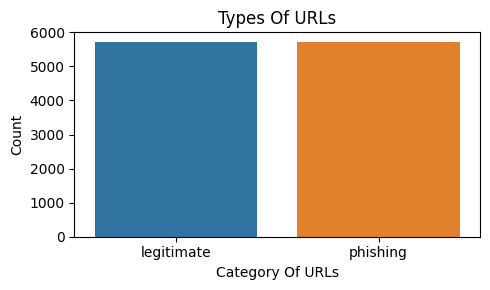

In [34]:
# Counting the occurrences of each unique value in the 'status' column
label_counts = data['status'].value_counts()
print(label_counts)

# Creating a figure for the plot and specifying the size
plt.figure(figsize=(5, 3))

# Creating a count plot using Seaborn
sns.countplot(x='status', data=data)
plt.title('Types Of URLs')
plt.xlabel('Category Of URLs')
plt.ylabel('Count')
plt.tight_layout() # Adjusting layout to prevent overlapping of labels
plt.show() # Displaying the plot


#### We observe that the dataset is already balanced

### Histograms of data distribution for each numerical column

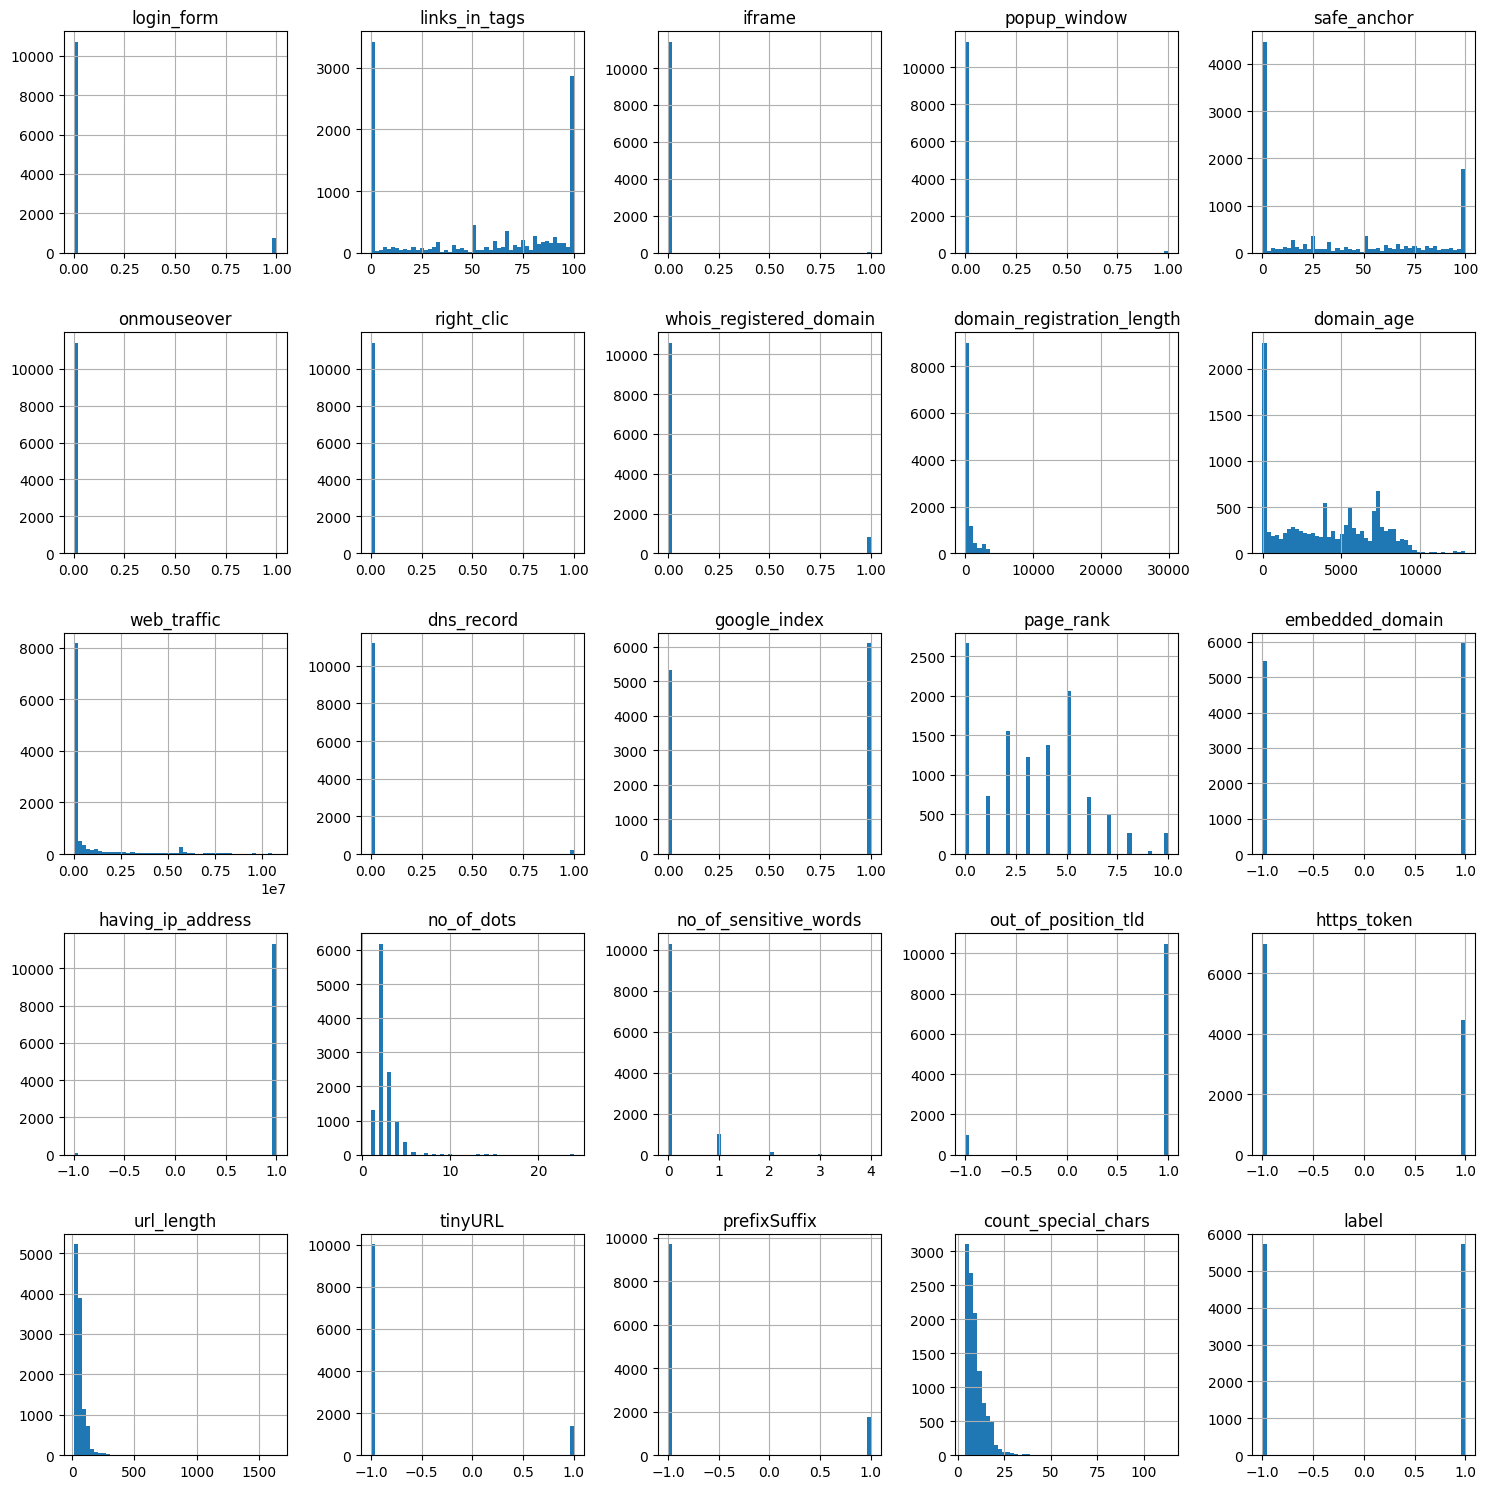

In [35]:
# Displaying histograms of data distribution for each numerical column
data.hist(bins = 50,figsize = (15,15))
plt.tight_layout() # Adjusting layout to prevent overlapping of labels
plt.show()

#### Observing that some columns have only discrete values whereas others have a continuous distribution

In [36]:
# Initialize an empty list to store boolean values indicating if each column is categorical
is_categorical = []

# Initialize empty lists to store the names of categorical and non-categorical columns
categorical_columns = []
non_categorical_columns = []

for col in data.columns:
    # Checking if the column has only two unique values, implying it's categorical
    if data[col].nunique() == 2:
        # Printing the column name and its unique values
        print(f'{col} contains:\t{unique_value_list}')
        is_categorical.append(True) # Appending True to indicate the column is categorical
        categorical_columns.append(col)
    else:
        # If the column has more than two unique values, it's non-categorical
        is_categorical.append(False) # Appending False to indicate the column is not categorical
        non_categorical_columns.append(col)

# print(is_categorical)        
        
# Display the list of categorical columns
print("Categorical columns: ", categorical_columns)

# Display the list of non-categorical columns
print("Non-categorical columns: ", non_categorical_columns)


login_form contains:	['legitimate' 'phishing']
iframe contains:	['legitimate' 'phishing']
popup_window contains:	['legitimate' 'phishing']
onmouseover contains:	['legitimate' 'phishing']
right_clic contains:	['legitimate' 'phishing']
whois_registered_domain contains:	['legitimate' 'phishing']
dns_record contains:	['legitimate' 'phishing']
google_index contains:	['legitimate' 'phishing']
embedded_domain contains:	['legitimate' 'phishing']
having_ip_address contains:	['legitimate' 'phishing']
out_of_position_tld contains:	['legitimate' 'phishing']
https_token contains:	['legitimate' 'phishing']
tinyURL contains:	['legitimate' 'phishing']
prefixSuffix contains:	['legitimate' 'phishing']
status contains:	['legitimate' 'phishing']
label contains:	['legitimate' 'phishing']
Categorical columns:  ['login_form', 'iframe', 'popup_window', 'onmouseover', 'right_clic', 'whois_registered_domain', 'dns_record', 'google_index', 'embedded_domain', 'having_ip_address', 'out_of_position_tld', 'https_tok

### Histogram for each non-categorical feature

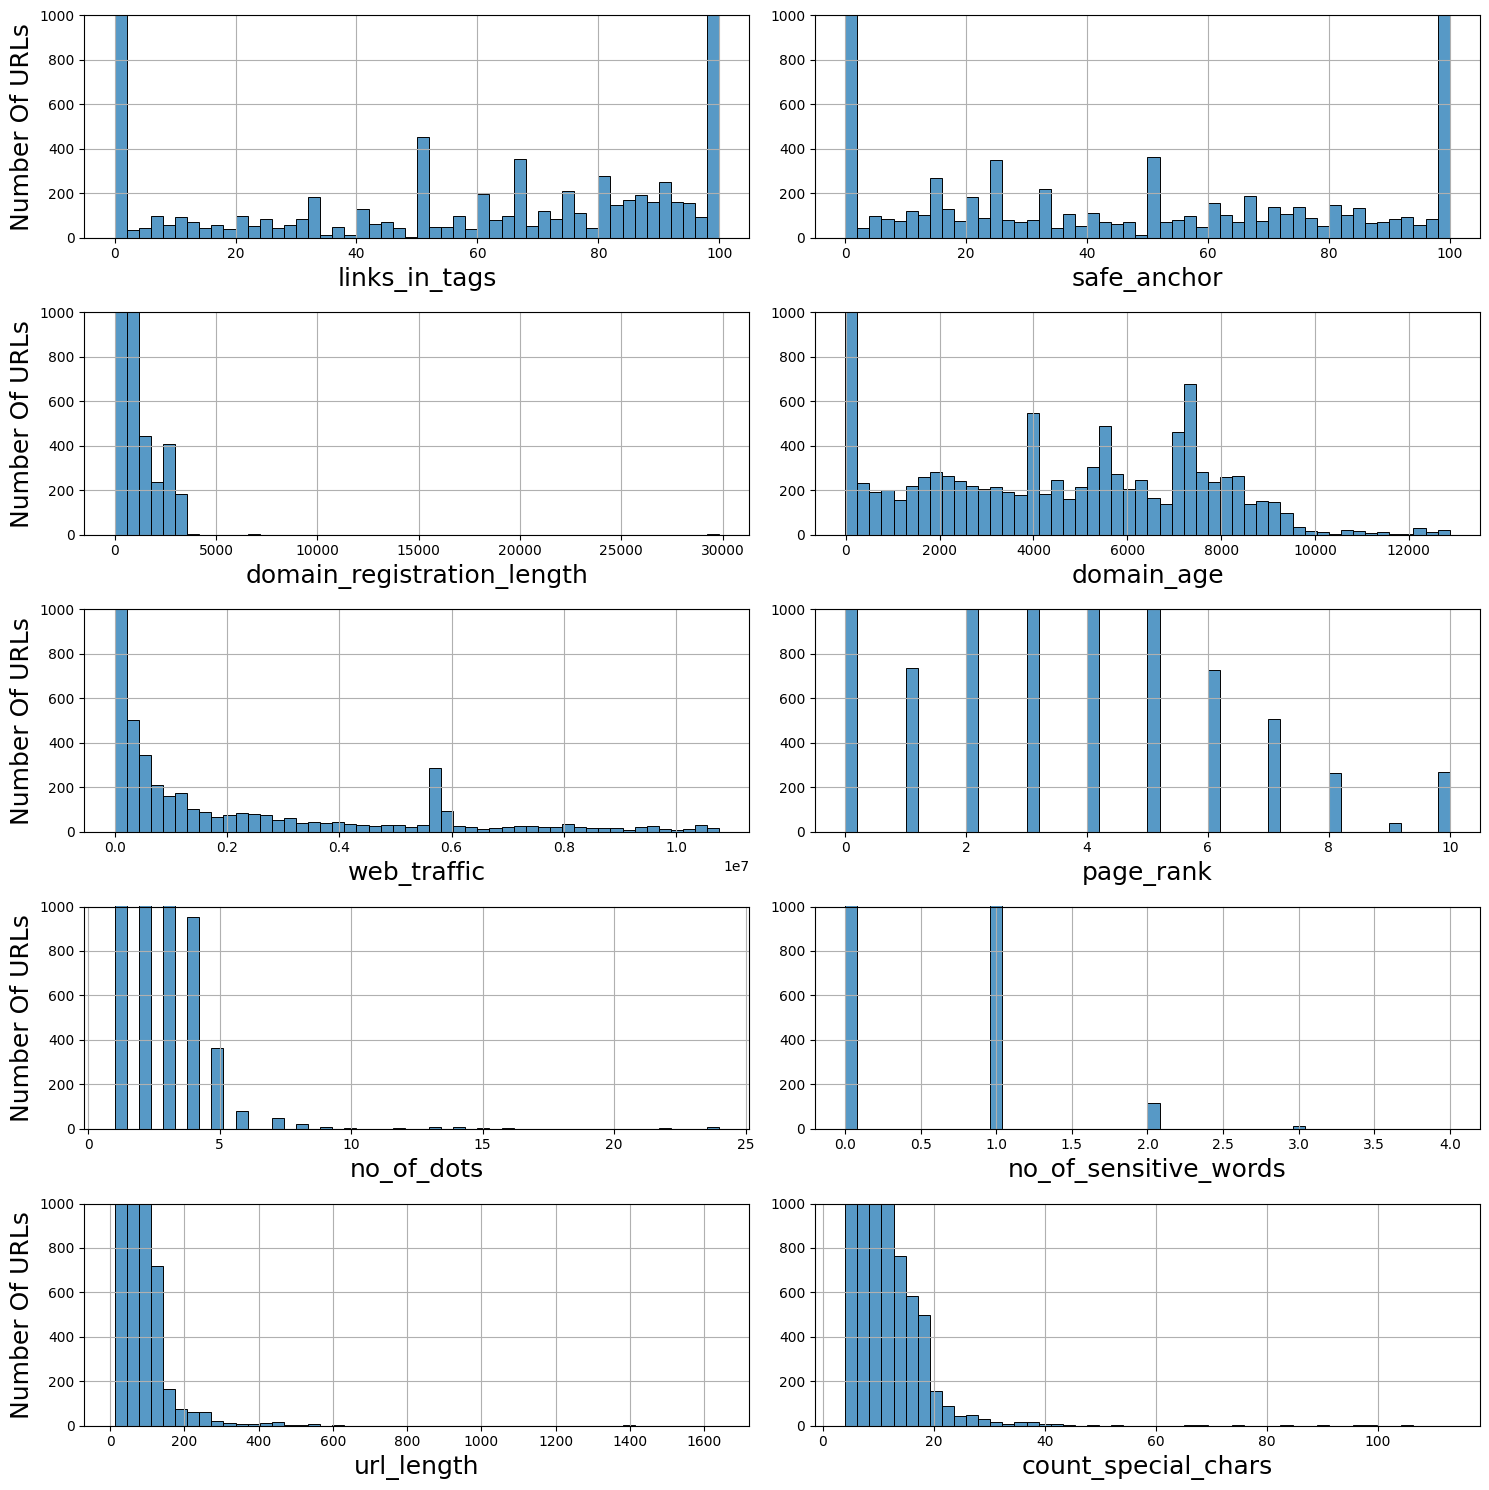

In [37]:
# Plotting a histogram for each non-categorical feature
# Calculate the number of rows needed for subplots
num_plots = len(non_categorical_columns)
num_rows = (num_plots + 1) // 2  # Round up to the nearest integer

# Creating subplots 
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 3*num_rows))

# Plotting a histogram for each non-categorical feature
for i, ax in enumerate(axes.flat):
    if i < num_plots:
        # Plot the histogram for the current column
        sns.histplot(data=data, x=non_categorical_columns[i], bins=50, edgecolor='black', ax=ax)
        
        # Set labels and limits
        ax.set_xlabel(non_categorical_columns[i], fontsize=18)
        ax.set_ylim(0, 1000)  # Setting upper_limit on values of y-axis as 1000
        ax.grid(True) # Add grid
        
        # Set ylabel only for the first plot of every row
        if i % 2 == 0:
            ax.set_ylabel("Number Of URLs", fontsize=18)
        else:
            ax.set_ylabel("")
    else:
        ax.remove() # Removing extra subplot if there are fewer plots than expected

plt.tight_layout()
plt.show()

### Distribution of urls in each categorical feature

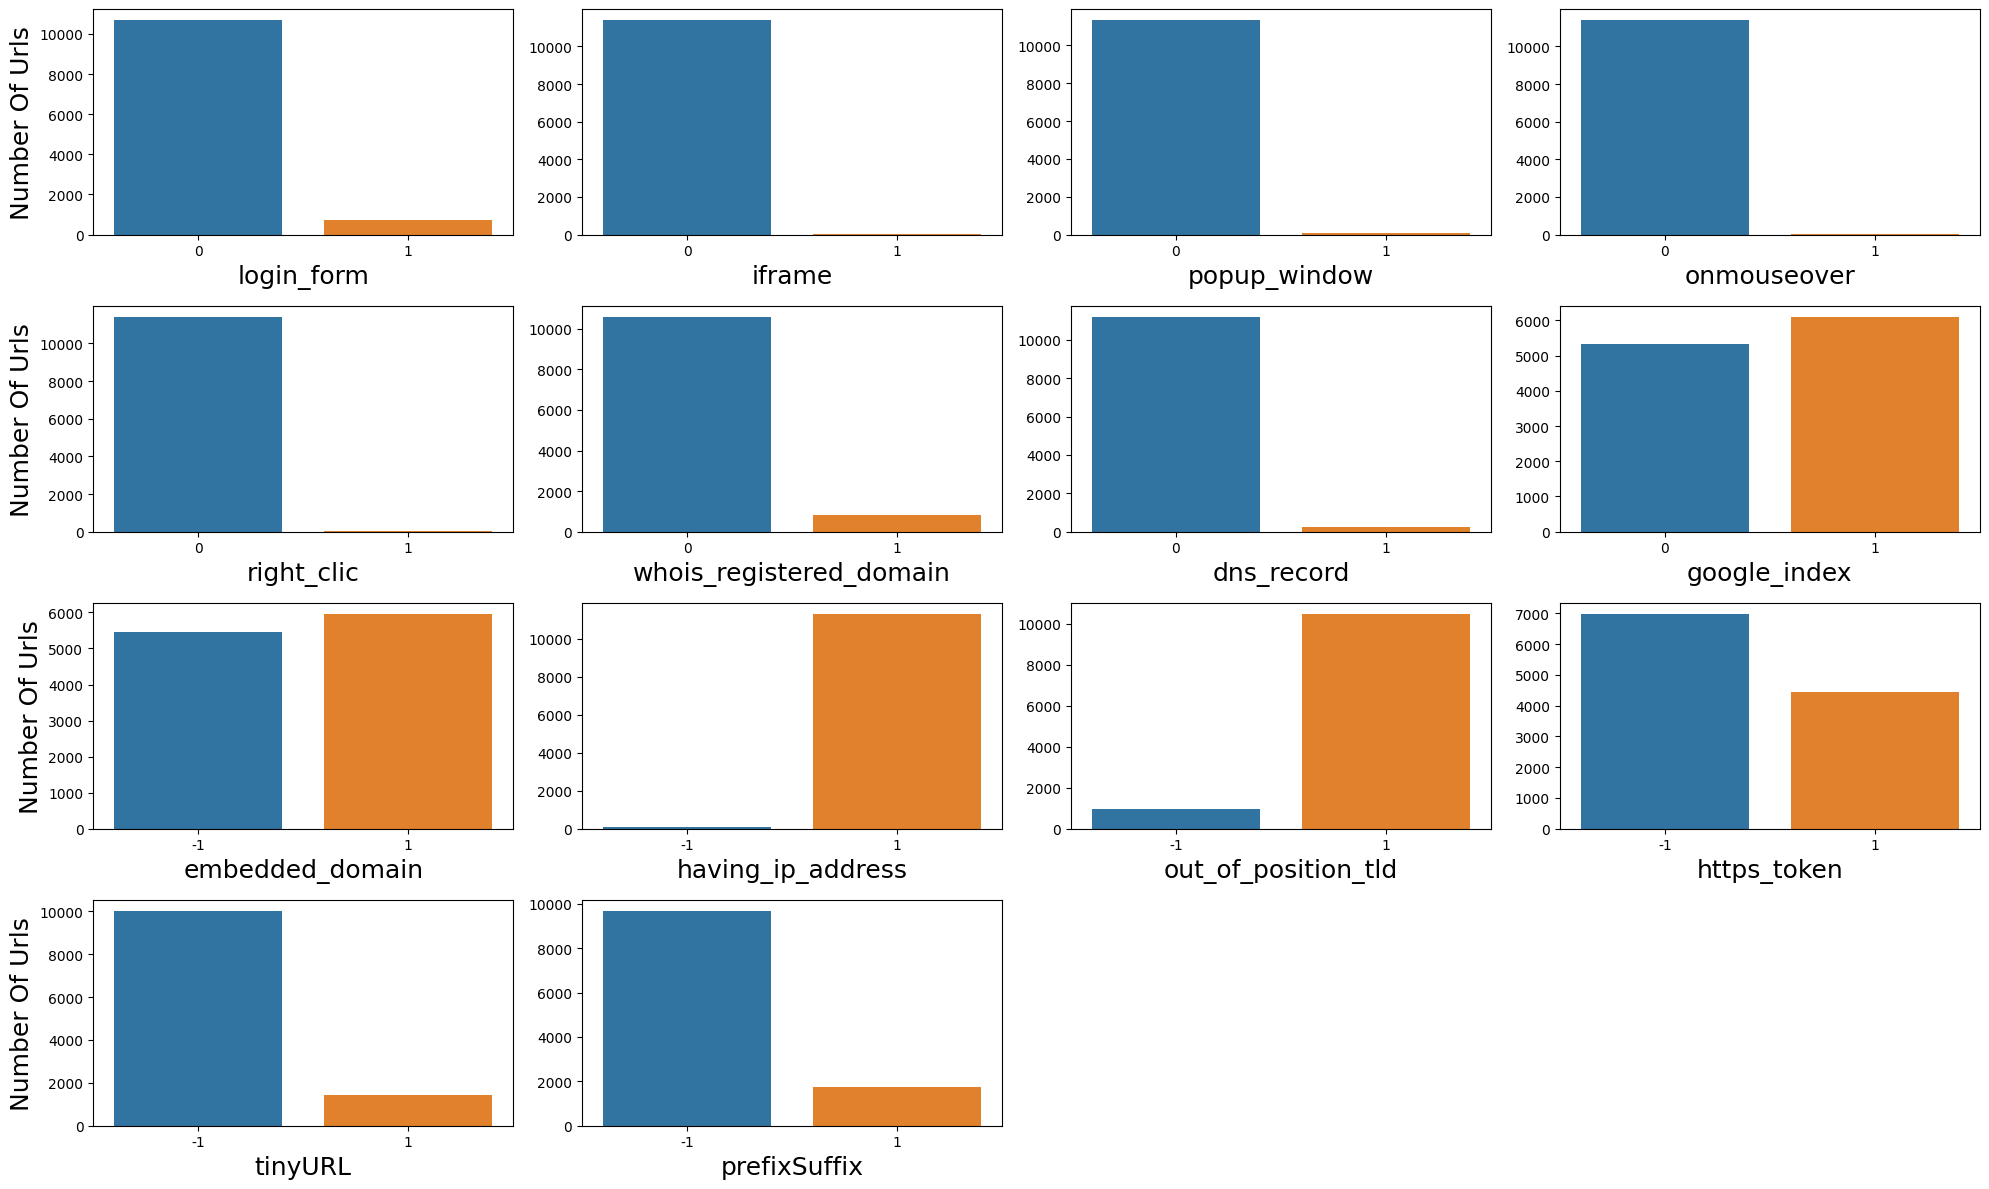

In [38]:
# Plotting distribution of urls in each categorical feature
# Calculate the number of rows needed for subplots
num_plots = len(categorical_columns)
num_rows = (num_plots + 3) // 4 

# Create subplots with the desired layout
fig, axes = plt.subplots(num_rows, 4, figsize=(20, 3*num_rows))
    
# Iterate over categorical columns and create count plots
for i, ax in enumerate(axes.flat):
    # Skip 'label' and 'status' columns
    if categorical_columns[i] == "label" or categorical_columns[i] == "status":
        continue
    
    # Remove extra subplots
    if i >= num_plots:
        ax.remove()
        continue
    
    # Plot countplot for the current column
    sns.countplot(x=categorical_columns[i], data=data, ax=ax)

    # Set labels
    ax.set_xlabel(categorical_columns[i], fontsize=18)
    if i % 4 == 0:
        ax.set_ylabel("Number Of Urls", fontsize=18)
    else:
        ax.set_ylabel("") 
        
plt.delaxes(axes[3][2])
plt.delaxes(axes[3][3])

plt.tight_layout()
plt.show()

#### We observe that 'iframe', 'popup_window', 'onmouseover', 'right_clic' will not be useful as the urls are not much spread across them. 

### Heatmap

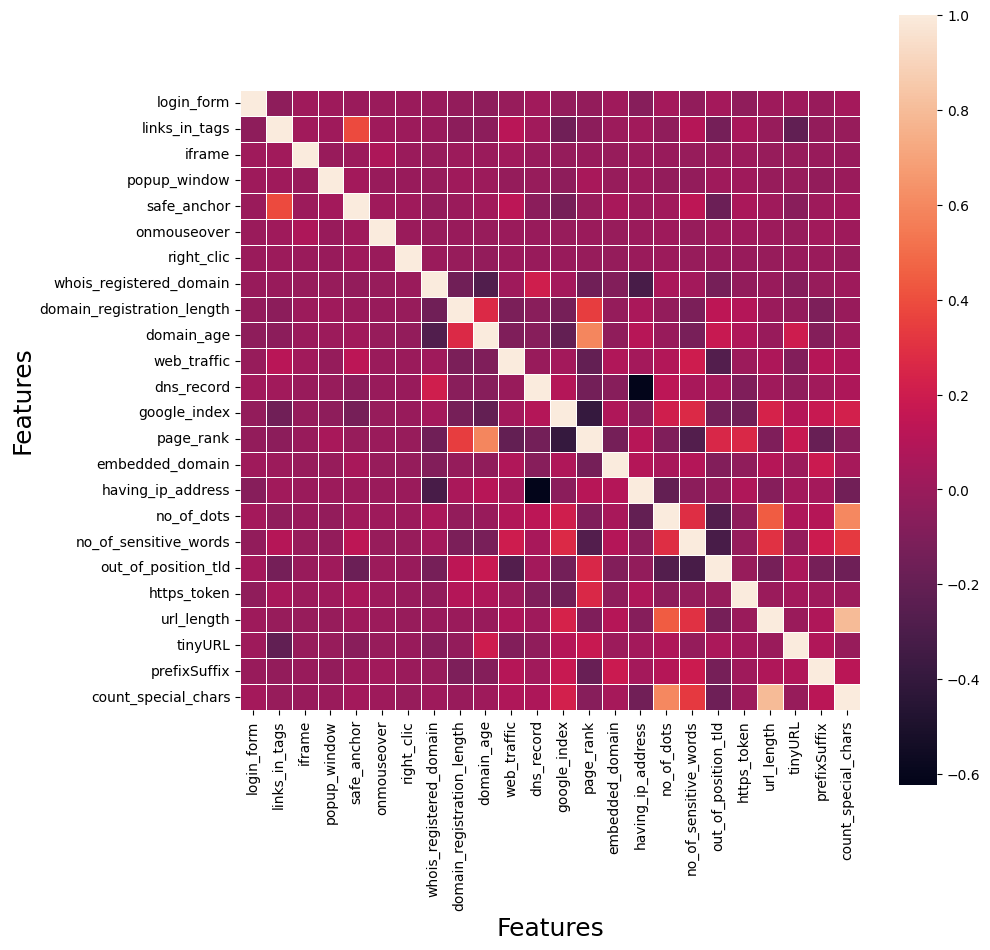

In [39]:
# Creating a correlation matrix of the columns, and visualizing it using a heatmap.
# Drop 'status' and 'label' columns from the DataFrame and store it as another copy
data2 = data.drop(columns=['status', 'label'])

# Set the figure size for the heatmap
plt.figure(figsize=(10, 10))

sns.heatmap(data2.corr(), square=True, linewidths=.5)

# Add proper labels to the heatmap
plt.xlabel("Features", fontsize=18)  
plt.ylabel("Features", fontsize=18)  

plt.show()

### Box plots for the non-categorical features

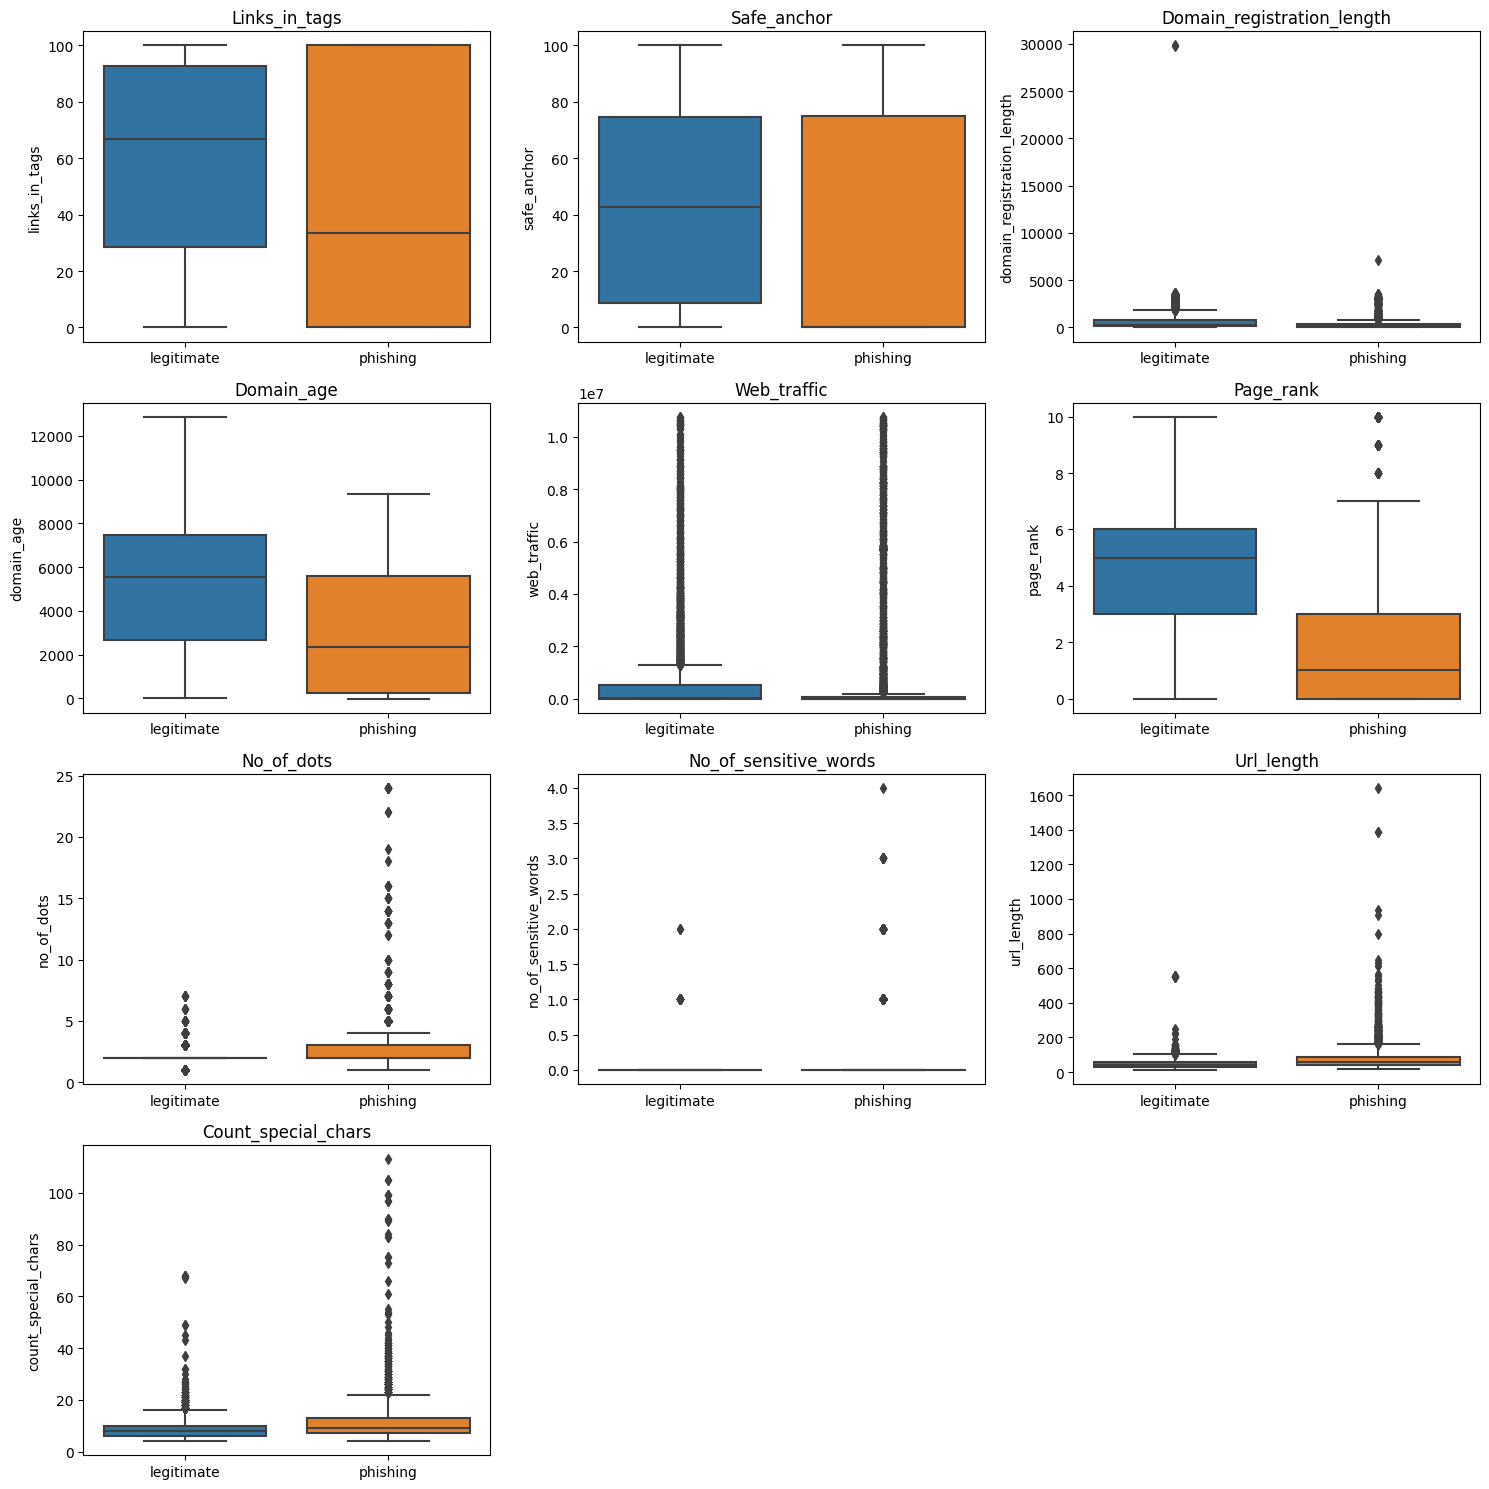

In [40]:
# Creating box plots for the non-categorical features
plt.figure(figsize=(15, 15))

for i, feature in enumerate(non_categorical_columns, 1):
    plt.subplot(4, 3, i)
    
    sns.boxplot(x='status', y=feature, data=data)
    
    # Set title, x-label, and y-label for the subplot
    plt.title(f'{feature.capitalize()}')  # Title with feature name
    plt.ylabel(feature)  # y-axis label
    plt.xlabel("")

plt.tight_layout()
plt.show()

### Bar plots for categorical features divided into subgroups

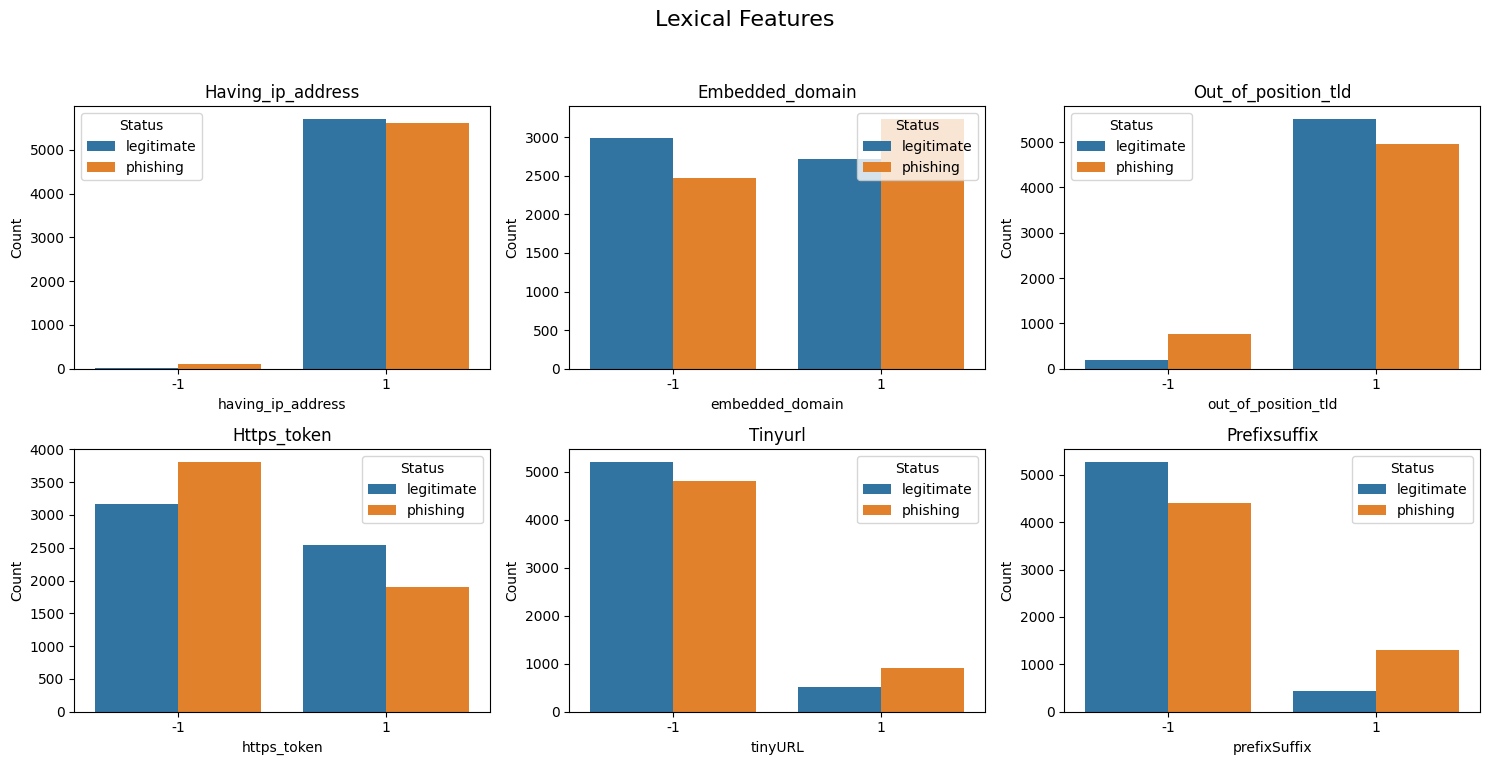

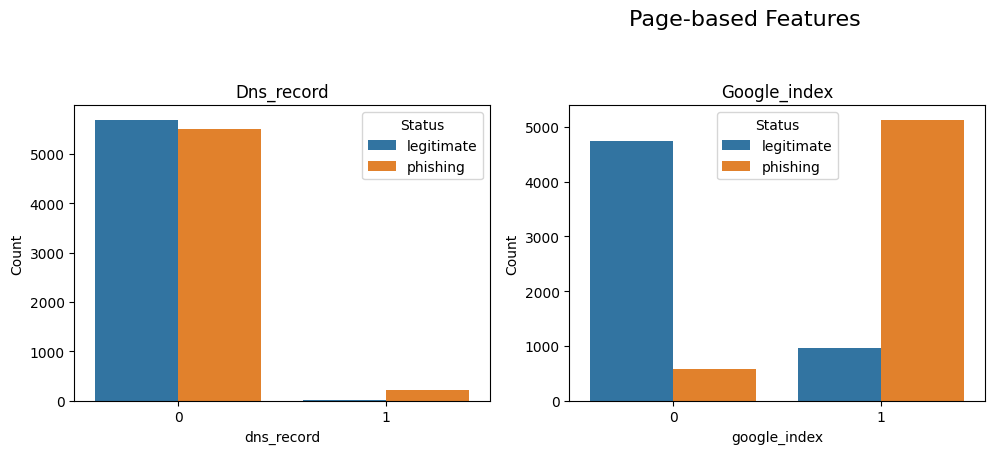

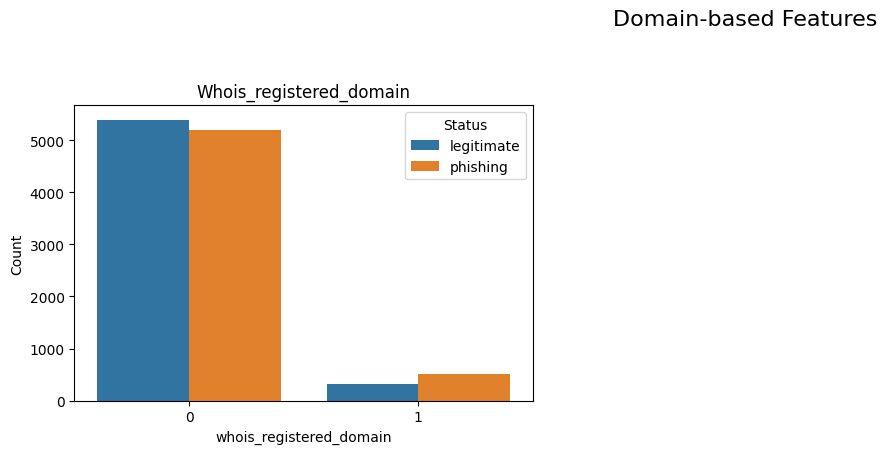

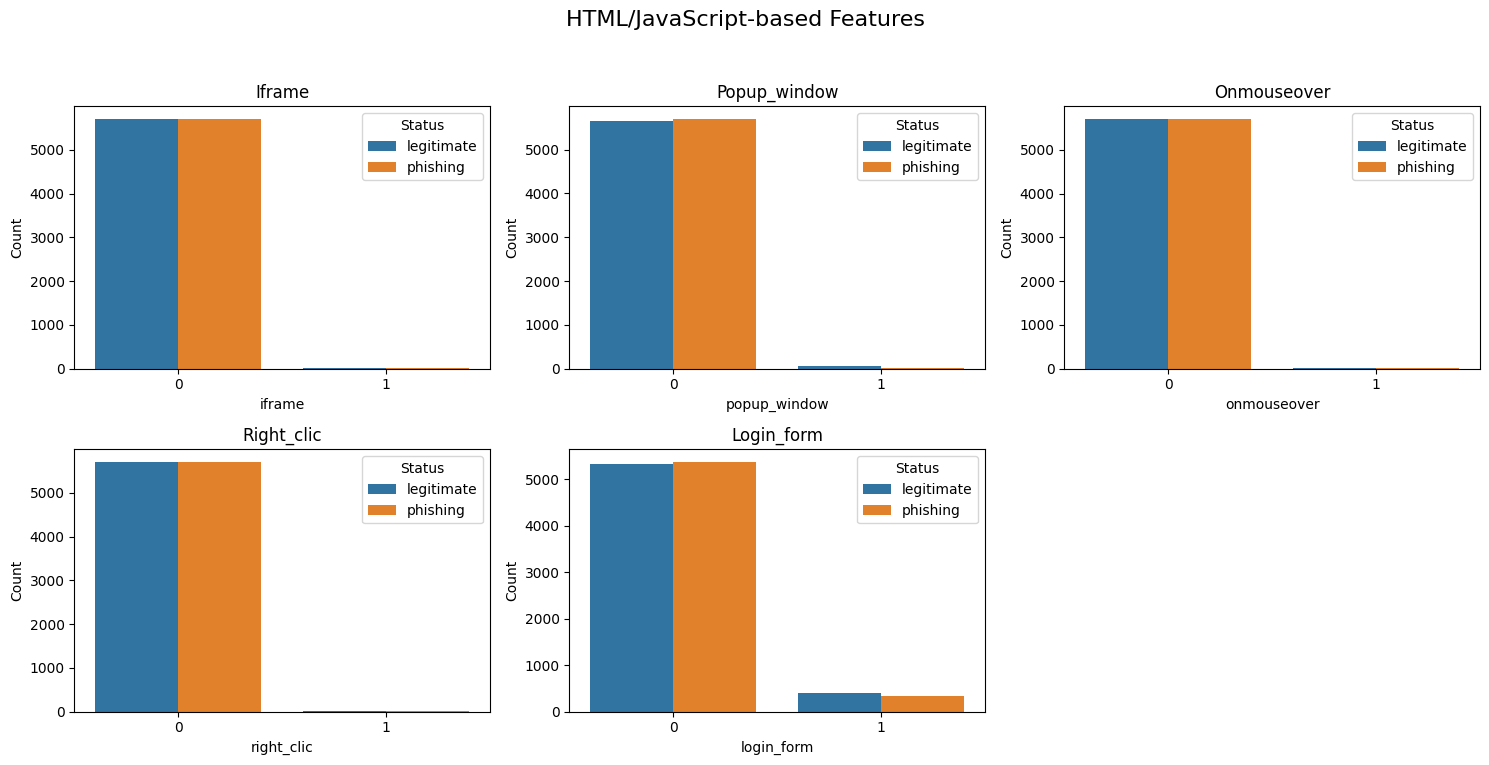

In [41]:
# Categorical columns:  ['login_form', 'iframe', 'popup_window', 'onmouseover', 'right_clic', 'whois_registered_domain', 'dns_record', 'google_index', 'embedded_domain', 'having_ip_address', 'out_of_position_tld', 'https_token', 'tinyURL', 'prefixSuffix']

# Define subgroups of categorical features
lexical_features = ['having_ip_address', 'embedded_domain', 'out_of_position_tld', 'https_token', 'tinyURL', 'prefixSuffix']
page_based_features = ['dns_record', 'google_index']
domain_based_features = ['whois_registered_domain']
html_javascript_based_features = ['iframe', 'popup_window', 'onmouseover', 'right_clic', 'login_form',]

# Dictionary to store feature groups
feature_groups = {
    'Lexical': lexical_features,
    'Page-based': page_based_features,
    'Domain-based': domain_based_features,
    'HTML/JavaScript-based': html_javascript_based_features
}

# Plotting bar plots for each feature group
for group_name, group_features in feature_groups.items():
    plt.figure(figsize=(15, 8))
    for i, feature in enumerate(group_features, 1):
        plt.subplot(2, 3, i)
        
        sns.countplot(x=feature, hue='status', data=data)
        
        plt.title(f'{feature.capitalize()}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.legend(title='Status')
        
    plt.suptitle(f'{group_name} Features', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [42]:
data = data.drop(columns=['label'])
data.head()

,login_form,links_in_tags,iframe,popup_window,safe_anchor,onmouseover,right_clic,whois_registered_domain,domain_registration_length,domain_age,...,having_ip_address,no_of_dots,no_of_sensitive_words,out_of_position_tld,https_token,url_length,tinyURL,prefixSuffix,count_special_chars,status
0,0,80.000000,0,0,0.0,0,0,0,45,-1,...,1,3,0,1,-1,37,-1,-1,7,legitimate
1,0,100.000000,0,0,100.0,0,0,0,77,5767,...,1,1,0,1,-1,77,-1,-1,7,phishing
2,0,100.000000,0,0,100.0,0,0,0,14,4004,...,1,4,1,-1,1,126,-1,1,19,phishing
3,0,100.000000,0,0,62.5,0,0,0,62,-1,...,1,2,0,1,-1,18,-1,-1,5,legitimate
4,1,76.470588,0,0,0.0,0,0,0,224,8175,...,1,2,0,1,-1,55,-1,-1,10,legitimate


In [43]:
# Saving the preprocessed dataset to a new csv file 
data.to_csv('/kaggle/working/Preprocessed_data.csv', index=False)